# Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

# Logistic Regression Assumptions

* Binary logistic regression requires the dependent variable to be binary.
* For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes.

# Logistic Regression from scratch

While Python’s scikit-learn library provides the easy-to-use and efficient LogisticRegression class, the objective of this post is to create an own implementation using NumPy. Implementing basic models is a great idea to improve your comprehension about how they work.

# Data set

We will use the well known Iris data set. It contains 3 classes of 50 instances each, where each class refers to a type of iris plant. To simplify things, we take just the first two feature columns. Also, the two non-linearly separable classes are labeled with the same category, ending up with a binary classification problem.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [4]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = (iris.target != 0) * 1

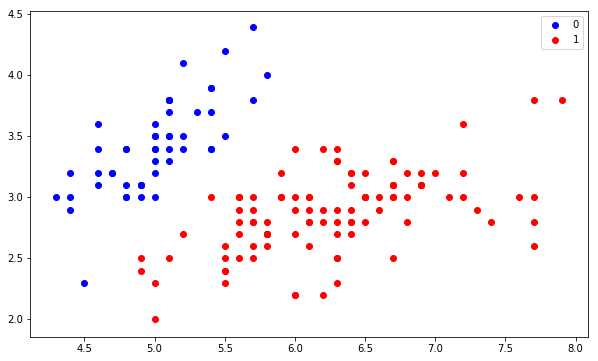

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

# Algorithm

Given a set of inputs X, we want to assign them to one of two possible categories (0 or 1). Logistic regression models the probability that each input belongs to a particular category.

# Hypothesis

A function takes inputs and returns outputs. To generate probabilities, logistic regression uses a function that gives outputs between 0 and 1 for all values of X. There are many functions that meet this description, but the used in this case is the logistic function. From here we will refer to it as sigmoid.

<img src="https://cdn-images-1.medium.com/max/800/1*HXCBO-Wx5XhuY_OwMl0Phw.png">

<img src="https://cdn-images-1.medium.com/max/800/1*p4hYc2VwJqoLWwl_mV0Vjw.png">

# Loss function

Functions have parameters/weights (represented by theta in our notation) and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function, defined as:

<img src="https://cdn-images-1.medium.com/max/800/1*FdxEs8Iv_43Q8calTCjnow.png">

# Gradient descent

Our goal is to minimize the loss function and the way we have to achive it is by increasing/decreasing the weights, i.e. fitting them. The question is, how do we know what parameters should be biggers and what parameters should be smallers? The answer is given by the derivative of the loss function with respect to each weight. It tells us how loss would change if we modified the parameters.

<img src="https://cdn-images-1.medium.com/max/800/1*gobKgGbRWDAoVFAan_HjxQ.png">



Then we update the weights by substracting to them the derivative times the learning rate.

We should repeat this steps several times until we reach the optimal solution.


# Predictions

By calling the sigmoid function we get the probability that some input x belongs to class 1. Let’s take all probabilities ≥ 0.5 = class 1 and all probabilities < 0 = class 0. This threshold should be defined depending on the business problem we were working.

# Putting it all together

In [8]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

# Evaluation

In [9]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [10]:
%time model.fit(X, y)

Wall time: 26.2 s


In [12]:
preds = model.predict(X)
# accuracy
(preds == y).mean()

1.0

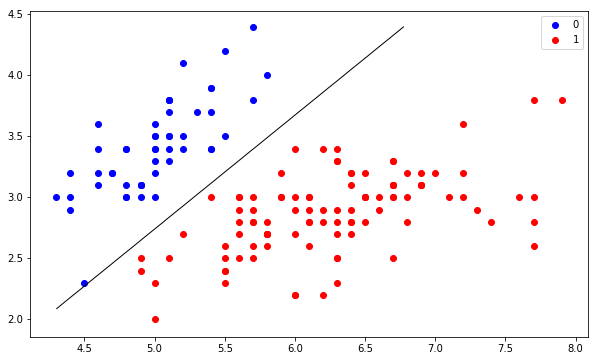

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

Picking a learning rate = 0.1 and number of iterations = 300000 the algorithm classified all instances successfully. 13.8 seconds were needed. These are the resulting weights:

In [15]:
model.theta

array([-25.96818124,  12.56179068, -13.44549335])

# LogisticRegression from sklearn:

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression(C=1e20)

In [18]:
%time model.fit(X, y)

Wall time: 1.3 s


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [21]:
model.intercept_, model.coef_

(array([-80.62725491]), array([[ 31.61988897, -28.31500665]]))

If we trained our implementation with smaller learning rate and more iterations we would find approximately equal weights. But the more remarkably difference is about training time, sklearn is order of magnitude faster. Anyway, is not the intention to put this code on production,

Source:https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

